# Import Dependencies

In [1]:
#import dependent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Load data

In [81]:
data = pd.read_csv('purchase_data.csv', encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 08:34,1.69,13047.0,United Kingdom


In [3]:
data.shape

(541909, 8)

# Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- Convert InvoiceDate column to datetime Data type 

In [44]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [6]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Treat Quantity Column

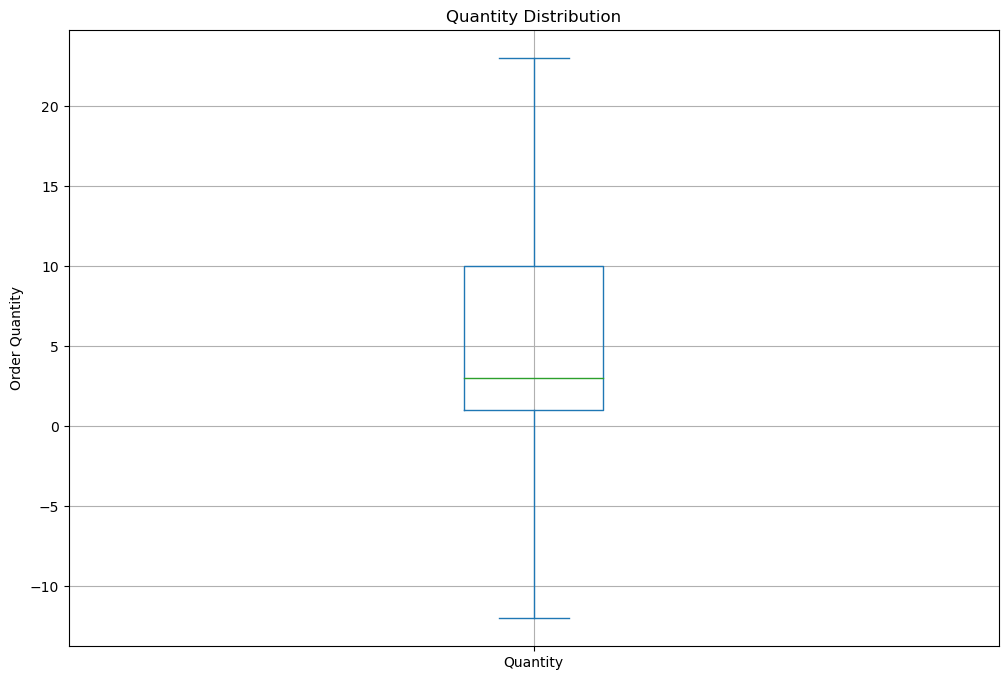

In [7]:
ax = data['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize = (12, 8)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [8]:
data.loc[data['Quantity'] > 0].shape

(531285, 8)

In [9]:
data.shape

(541909, 8)

In [45]:
data = data.loc[data['Quantity'] > 0]

# Feature Engineering

In [46]:
data['TotalPrice'] = data['UnitPrice'] * data ['Quantity']

In [12]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,54.08


# Time Series Analysis

- Total Revenue

In [51]:
monthly_revenue_df = pd.DataFrame(data.set_index('InvoiceDate')['TotalPrice'].resample('M').sum())

# Rename the columns
monthly_revenue_df.columns = ['Total Revenue']

# Reset index to convert the index to a column
monthly_revenue_df.reset_index(inplace=True)

# Format the 'Month' column
monthly_revenue_df['Month'] = monthly_revenue_df['InvoiceDate'].dt.strftime('%B %Y')

# Drop the original 'InvoiceDate' column if not needed
monthly_revenue_df.drop(columns='InvoiceDate', inplace=True)

# Display the DataFrame
monthly_revenue_df

,Total Revenue,Month
0,58960.790,January 2010
1,47748.380,February 2010
2,46943.710,March 2010
3,0.000,April 2010
4,31774.950,May 2010
5,54830.460,June 2010
6,99618.200,July 2010
7,45389.980,August 2010
8,53586.180,September 2010
9,59182.920,October 2010


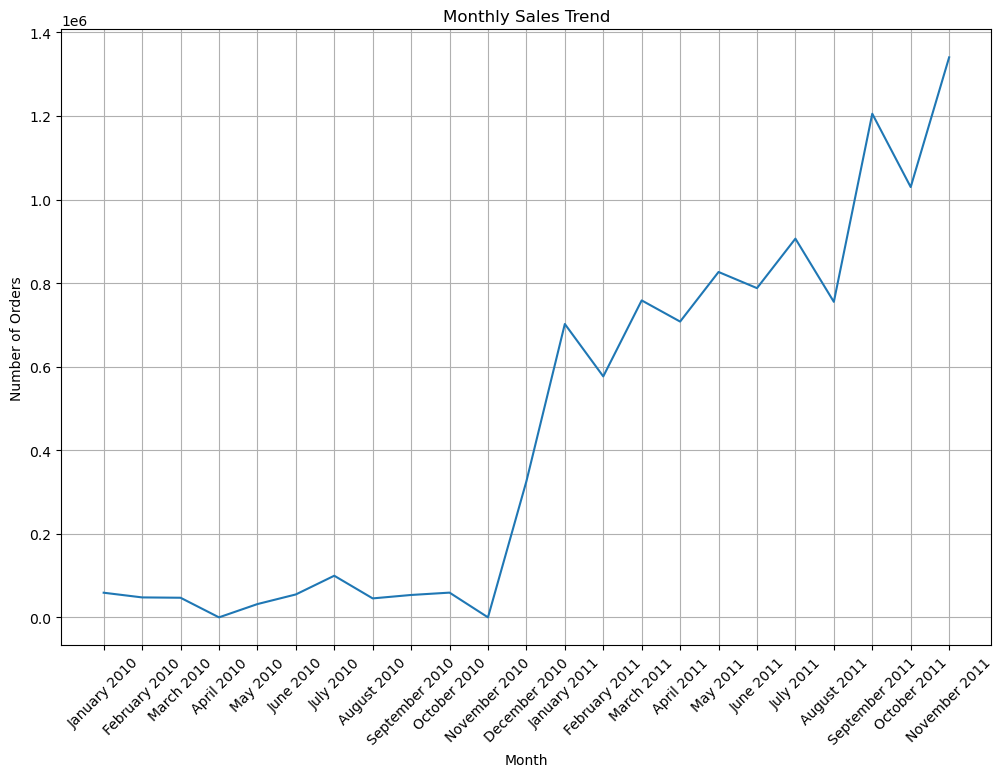

In [57]:
#Visualize trend using line graph
ax  = monthly_revenue_df.plot(
    grid = True,
    figsize = (12, 8),
    legend = False
)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Orders')
ax.set_title('Monthly Sales Trend')

plt.xticks(range(len(monthly_revenue_df.index)),
           monthly_revenue_df['Month'],
           rotation = 45
          )
plt.show()

In [15]:
invoice_dates = data.loc[data['InvoiceDate'] >= '2011-12-01', 'InvoiceDate']
Min_date = invoice_dates.min()
Max_date = invoice_dates.max()
print(f'The Minimum date is {Min_date} \nThe Maximum date is {Max_date}.')

The Minimum date is 2011-12-01 09:26:00 
The Maximum date is 2011-12-10 17:19:00.


In [16]:
data.loc[data['InvoiceDate'] < '2011-12-01'].shape

(518963, 9)

In [17]:
data.shape

(531285, 9)

In [52]:
data = data.loc[data['InvoiceDate'] < '2011-12-01']

In [54]:
monthly_revenue_df = pd.DataFrame(data.set_index('InvoiceDate')['TotalPrice'].resample('M').sum())

# Rename the columns
monthly_revenue_df.columns = ['Total Revenue']

# Reset index to convert the index to a column
monthly_revenue_df.reset_index(inplace=True)

# Format the 'Month' column
monthly_revenue_df['Month'] = monthly_revenue_df['InvoiceDate'].dt.strftime('%B %Y')

# Drop the original 'InvoiceDate' column if not needed
monthly_revenue_df.drop(columns='InvoiceDate', inplace=True)

# Display the DataFrame
monthly_revenue_df

,Total Revenue,Month
0,58960.790,January 2010
1,47748.380,February 2010
2,46943.710,March 2010
3,0.000,April 2010
4,31774.950,May 2010
5,54830.460,June 2010
6,99618.200,July 2010
7,45389.980,August 2010
8,53586.180,September 2010
9,59182.920,October 2010


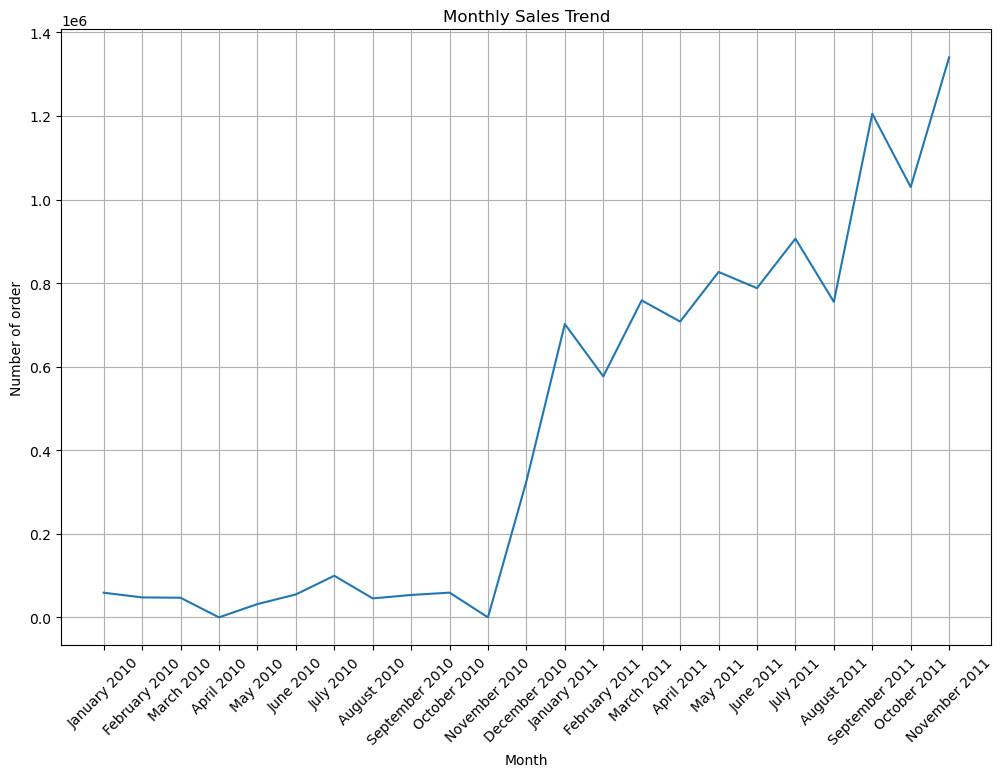

In [67]:
ax = monthly_revenue_df.plot(
    grid = True,
    figsize = (12, 8),
    legend = False
)

ax.set_ylabel('Number of order')
ax.set_xlabel('Month')
ax.set_title('Monthly Sales Trend')

ax.set_xticks(range(len(monthly_revenue_df.index)), 
              monthly_revenue_df['Month'],
             rotation = 45)
plt.show()

- Monthly Transaction

In [23]:
monthly_order_df = pd.DataFrame(data.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique())

# Rename the columns
monthly_order_df.columns = ['Number of Orders']

# Reset index to convert the index to a column
monthly_order_df.reset_index(inplace=True)

# Format the 'Month' column
monthly_order_df['Month'] = monthly_order_df['InvoiceDate'].dt.strftime('%B %Y')

# Drop the original 'InvoiceDate' column if not needed
monthly_order_df.drop(columns='InvoiceDate', inplace=True)

# Display the DataFrame
print(monthly_order_df)

    Number of Orders           Month
0                136    January 2010
1                143   February 2010
2                 73      March 2010
3                  0      April 2010
4                 88        May 2010
5                108       June 2010
6                 85       July 2010
7                123     August 2010
8                132  September 2010
9                 81    October 2010
10                 0   November 2010
11               660   December 2010
12              1364    January 2011
13              1211   February 2011
14              1509      March 2011
15              1452      April 2011
16              1704        May 2011
17              1725       June 2011
18              1750       July 2011
19              1594     August 2011
20              1812  September 2011
21              1930    October 2011
22              2536   November 2011


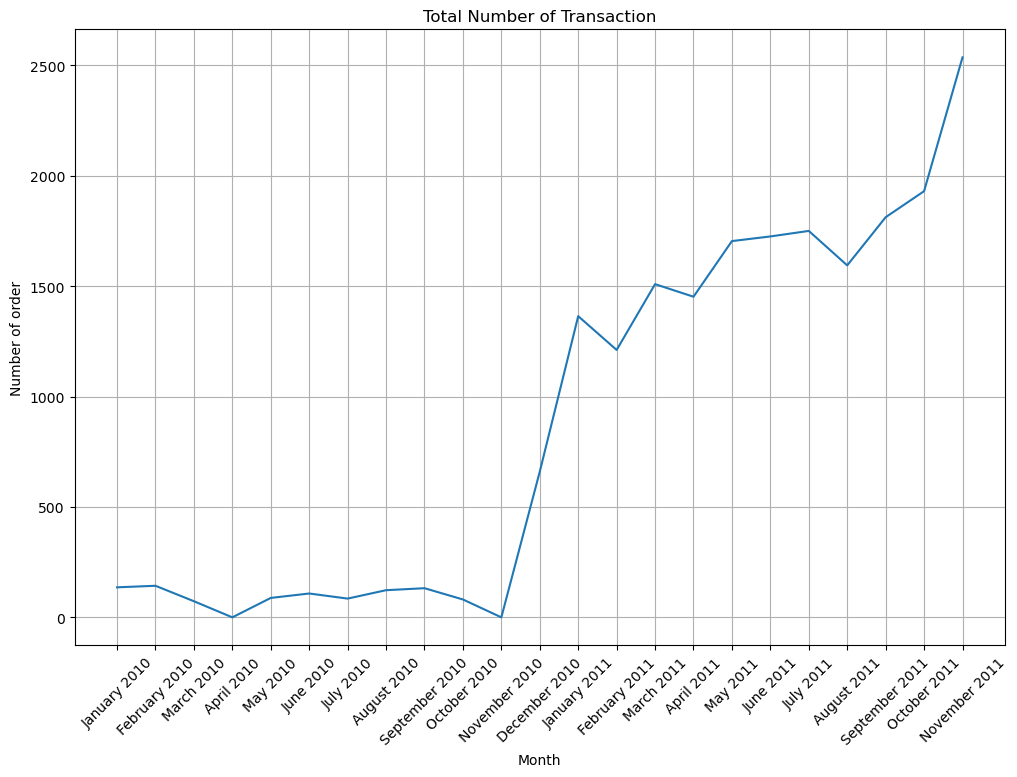

In [24]:
ax = monthly_order_df.plot(
    grid = True,
    figsize = (12, 8),
    legend = False
)

ax.set_ylabel('Number of order')
ax.set_xlabel('Month')
ax.set_title('Total Number of Transaction')
ax.set_xticks(range(len(monthly_order_df.index)), 
              monthly_order_df['Month'],
             rotation = 45)
plt.show()

# Products Category Analysis

- Products with highest Revenue

In [27]:
Product_cat_df = pd.DataFrame(
    data.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
Product__df

Quantity
InvoiceDate StockCode          
2010-01-31  10002            60
            10125             2
            10133             5
            10135             1
            11001             3
...                         ...
2011-11-30  DCGSSGIRL         1
            DOT              45
            M              1822
            POST           1437
            S                 1

[47488 rows x 1 columns]

In [29]:
# Sort Products by the last month sales
last_month_sorted_df = Product_cat_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,StockCode,Quantity
0,84826,12543
1,23084,10775
2,22197,9639
3,85123A,6868
4,22086,5498
...,...,...
3216,90070,1
3217,40003,1
3218,46000U,1
3219,90074,1


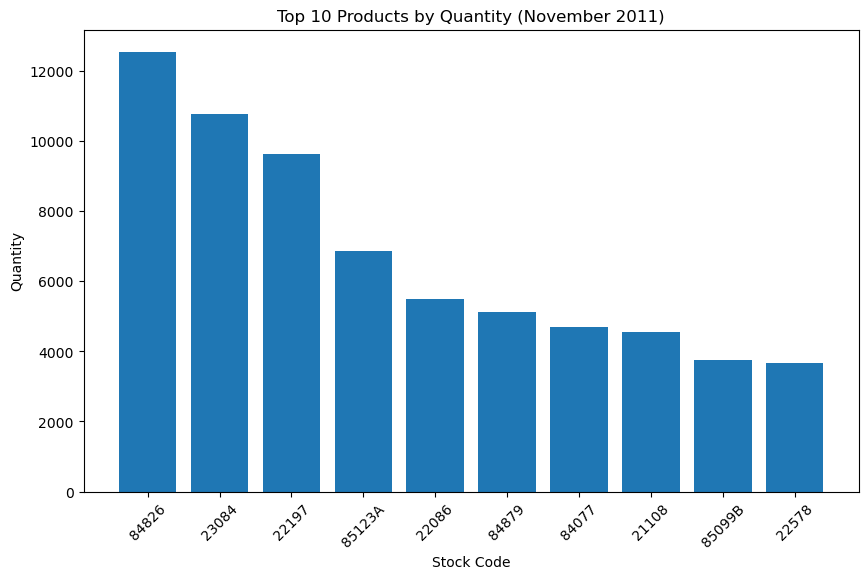

In [68]:
top_10_products = last_month_sorted_df.head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['StockCode'], top_10_products['Quantity'])

# Customize the plot
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.title('Top 10 Products by Quantity (November 2011)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [36]:
# Select the top 5 items
Top_Product_cat_df = pd.DataFrame(
    data.loc[
        data['StockCode'].isin(['84826', '23084', '22197', "85123A", '22086'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)
Top_Product_cat_df

Quantity
InvoiceDate StockCode          
2010-01-31  22086           274
            22197           271
            85123A          454
2010-02-28  22086           136
            22197            74
...                         ...
2011-11-30  22086          5498
            22197          9639
            23084         10775
            84826         12543
            85123A         6868

[85 rows x 1 columns]

- Exploring Seasonal Variation in Products

In [37]:
sustained_prod_df = Top_Product_cat_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

sustained_prod_df = sustained_prod_df.reset_index()
sustained_prod_df = sustained_prod_df.set_index('InvoiceDate')
sustained_prod_df.columns = sustained_prod_df.columns.droplevel(0)

sustained_prod_df

StockCode,22086,22197,23084,84826,85123A
InvoiceDate,,,,,
2010-01-31,274.0,271.0,0.0,0.0,454.0
2010-02-28,136.0,74.0,0.0,60.0,309.0
2010-03-31,140.0,67.0,0.0,0.0,25.0
2010-05-31,133.0,81.0,0.0,0.0,198.0
2010-06-30,237.0,265.0,0.0,0.0,161.0
2010-07-31,274.0,130.0,0.0,0.0,331.0
2010-08-31,107.0,213.0,0.0,0.0,151.0
2010-09-30,154.0,260.0,0.0,0.0,195.0
2010-10-31,223.0,95.0,0.0,0.0,165.0


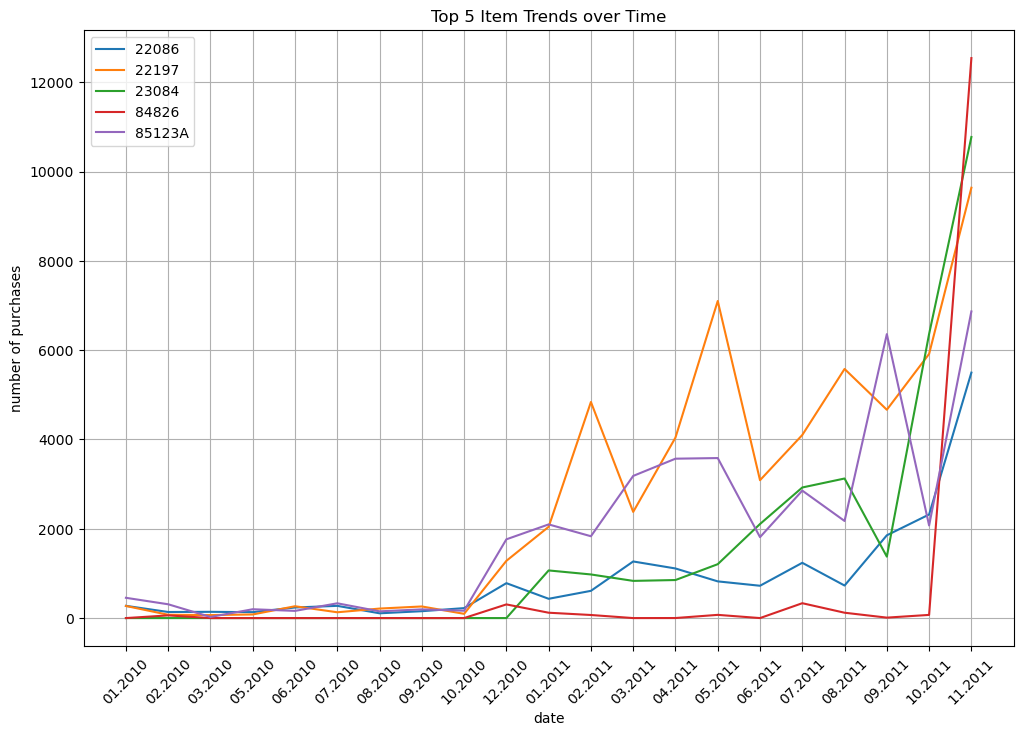

In [70]:
ax = pd.DataFrame(sustained_prod_df.values).plot(
    figsize=(12,8),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Top 5 Item Trends over Time')

ax.legend(sustained_prod_df.columns, loc='upper left')

plt.xticks(
    range(len(sustained_prod_df.index)), 
    [x.strftime('%m.%Y') for x in sustained_prod_df.index], 
    rotation=45
)

plt.show()

       Season StockCode  Quantity
2390   Autumn     23843     80995
12721  Winter     23166     74327
1040   Autumn     22197     20577
1868   Autumn     23084     18515
6326   Spring     84077     18452
2771   Autumn     84077     16053
3178   Autumn    85123A     15662
10320  Summer    85099B     15554
4654   Spring     22197     13671
8222   Summer     22197     13377


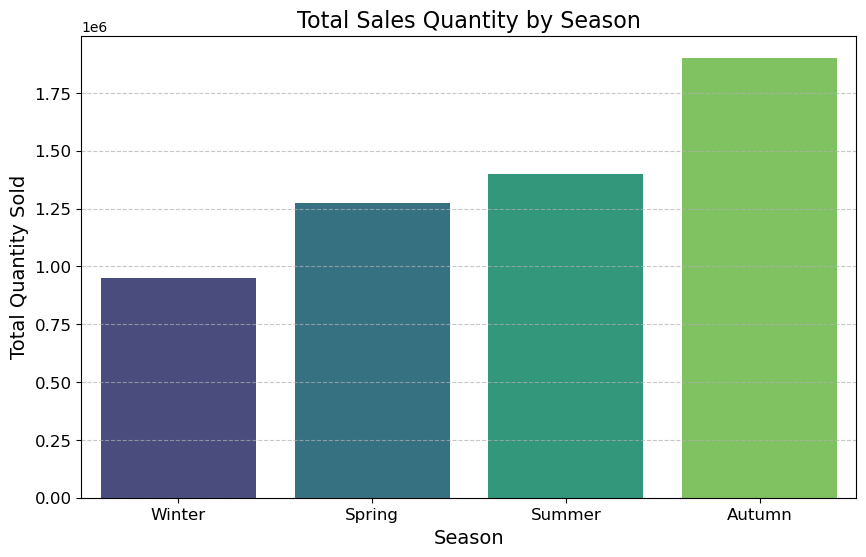

In [73]:
# Convert InvoiceDate to datetime format and extract seasons
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d/%m/%Y %H:%M')
data['Month'] = data['InvoiceDate'].dt.month

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(get_season)

# Group by Season and Description to analyze product sales patterns
seasonal_sales = data.groupby(['Season', 'StockCode'])['Quantity'].sum().reset_index()

# Display top products for each season
print(seasonal_sales.sort_values(by='Quantity', ascending=False).head(10))

# Aggregate sales quantity by season for visualization
seasonal_summary = data.groupby('Season')['Quantity'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot seasonal sales patterns
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_summary.index, y=seasonal_summary.values, palette='viridis')
plt.title('Total Sales Quantity by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [79]:
# Get unique seasons
unique_seasons = data['Season'].unique()

# Iterate over each season and display top products
for season in unique_seasons:
    season_df = seasonal_sales[seasonal_sales['Season'] == season]
    top_products = season_df.sort_values(by='Quantity', ascending=False).head(10)
    print(f"Top Products for {season}")
    print(top_products)
    print()

Top Products for Winter
       Season StockCode  Quantity
12721  Winter     23166     74327
13469  Winter     84077      9700
11816  Winter     22197      8511
11161  Winter     21212      8160
13868  Winter    85099B      7623
13886  Winter    85123A      6458
11605  Winter     21915      6260
13185  Winter     37413      5690
13703  Winter     84879      5379
12271  Winter     22693      5288

Top Products for Spring
      Season StockCode  Quantity
6326  Spring     84077     18452
4654  Spring     22197     13671
3612  Spring     15036     12311
6748  Spring    85099B     11584
6573  Spring     84879     10716
6765  Spring    85123A     10561
5031  Spring     22616      9752
4009  Spring     21212      9307
4480  Spring     21977      8943
4635  Spring     22178      8830

Top Products for Summer
       Season StockCode  Quantity
10320  Summer    85099B     15554
8222   Summer     22197     13377
9917   Summer     84077      9685
7575   Summer     21212      9092
9051   Summer     2

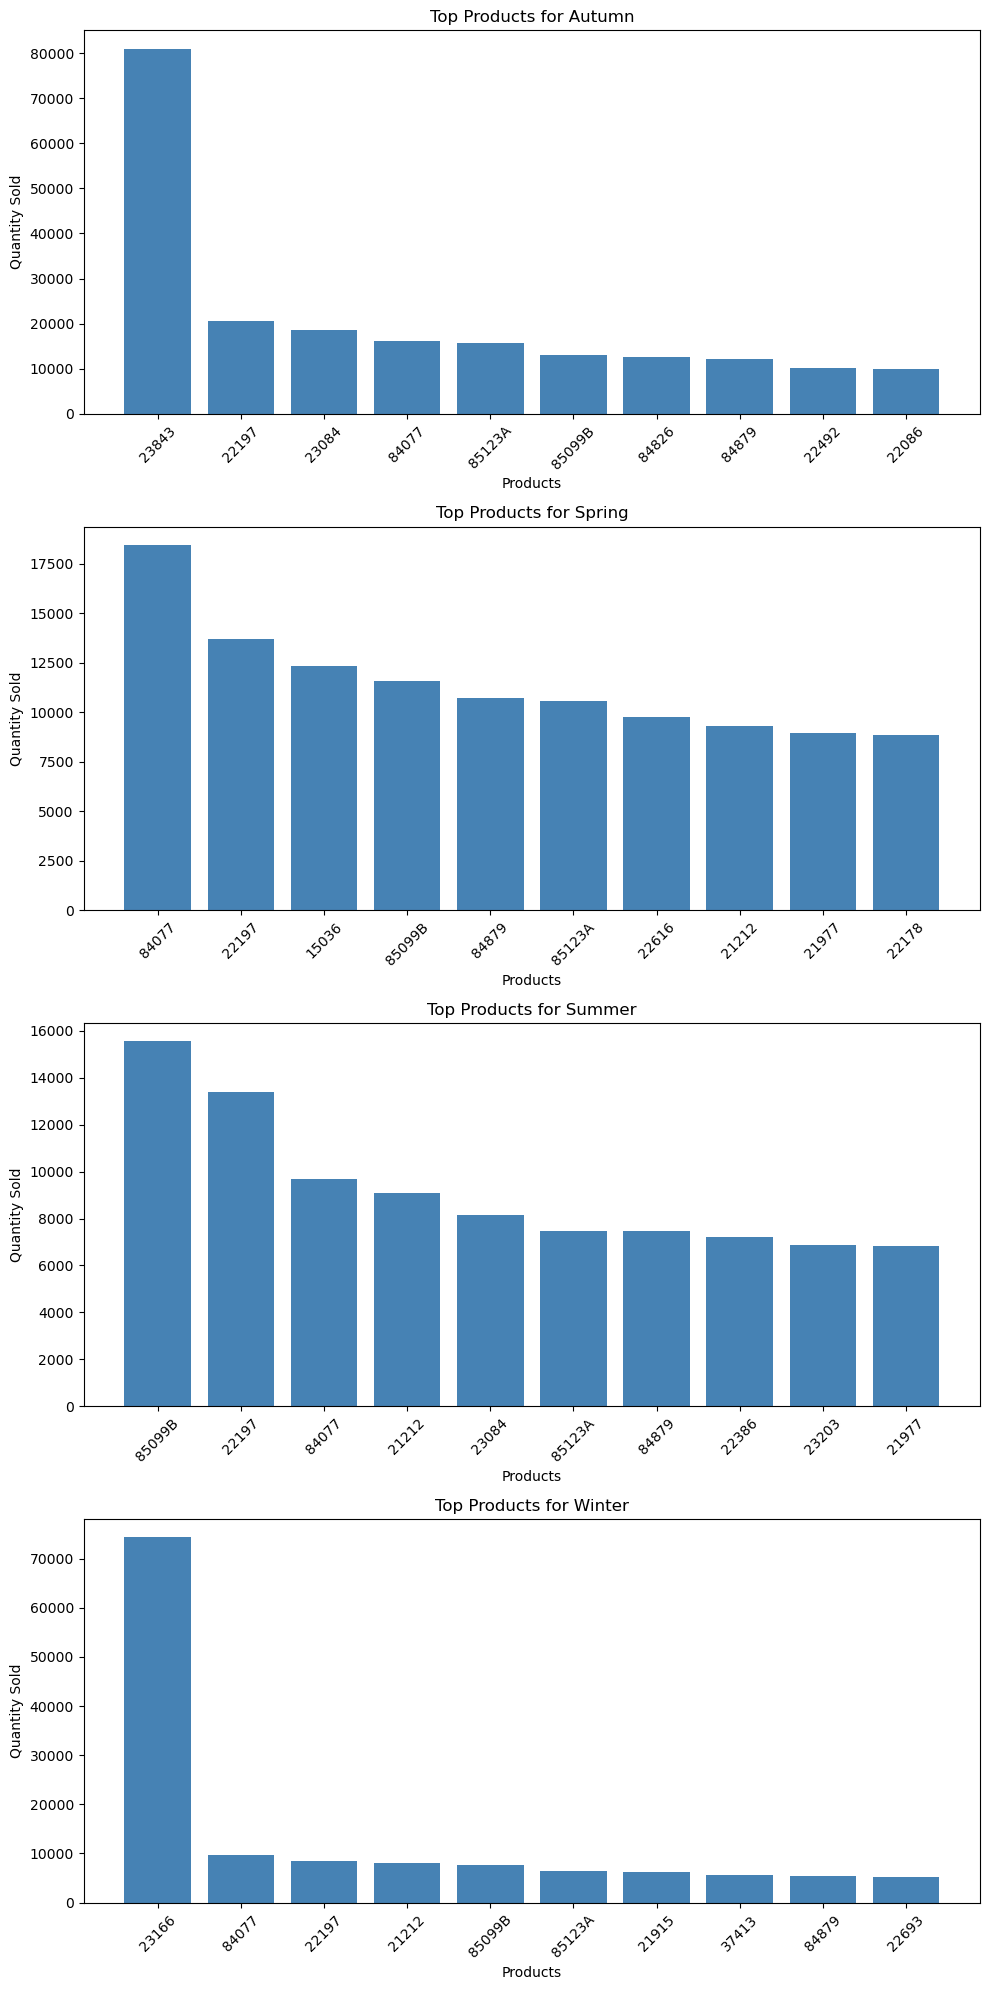

In [80]:
# Get unique seasons
unique_seasons = seasonal_sales['Season'].unique()

# Set up the subplots
num_seasons = len(unique_seasons)
fig, axes = plt.subplots(num_seasons, 1, figsize=(10, 5 * num_seasons))

# Iterate over each season and display top products in separate plots
for ax, season in zip(axes, unique_seasons):
    season_df = seasonal_sales[seasonal_sales['Season'] == season]
    top_products = season_df.sort_values(by='Quantity', ascending=False).head(10)

    # Plotting
    ax.bar(top_products['StockCode'], top_products['Quantity'], color='steelblue')
    ax.set_title(f'Top Products for {season}')
    ax.set_xlabel('Products')
    ax.set_ylabel('Quantity Sold')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()